In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import randint

In [4]:
# load data for training a model
df = pd.read_csv('train - train.csv')

## clean df data

In [5]:
# check data conistency (no object type columns)
df.dtypes.value_counts()

float64    13
int64       8
Name: count, dtype: int64

In [6]:
# check df data for null values
df.isnull().any(axis=0)

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc                True
four_g            True
int_memory        True
m_dep             True
mobile_wt         True
n_cores           True
pc                True
px_height         True
px_width          True
ram               True
sc_h              True
sc_w              True
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [7]:
# replace each null value with the median value in its column
df = df.fillna(df.median())
df.isnull().any(axis=0)

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [8]:
# check if there is a duplication of entries
print(f"{len(df[df.duplicated()])} entries are duplicates")

0 entries are duplicates


## explaratory df data

[Text(0, 0, '500'), Text(0, 0, '500'), Text(0, 0, '500'), Text(0, 0, '500')]

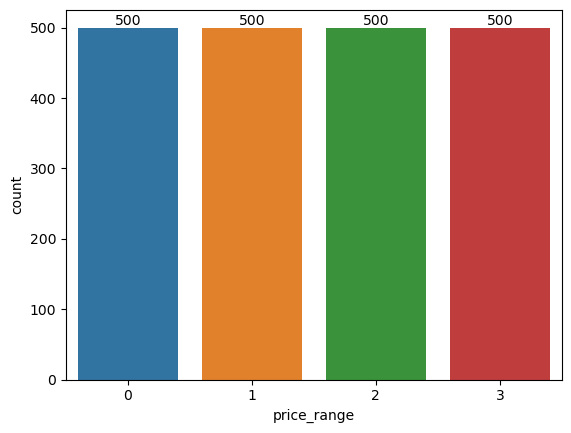

In [9]:
# show the distribution of the target variable

ax=sns.countplot(data=df, x='price_range')
ax.bar_label(ax.containers[0])

# result: data is balanced

<Figure size 640x480 with 0 Axes>

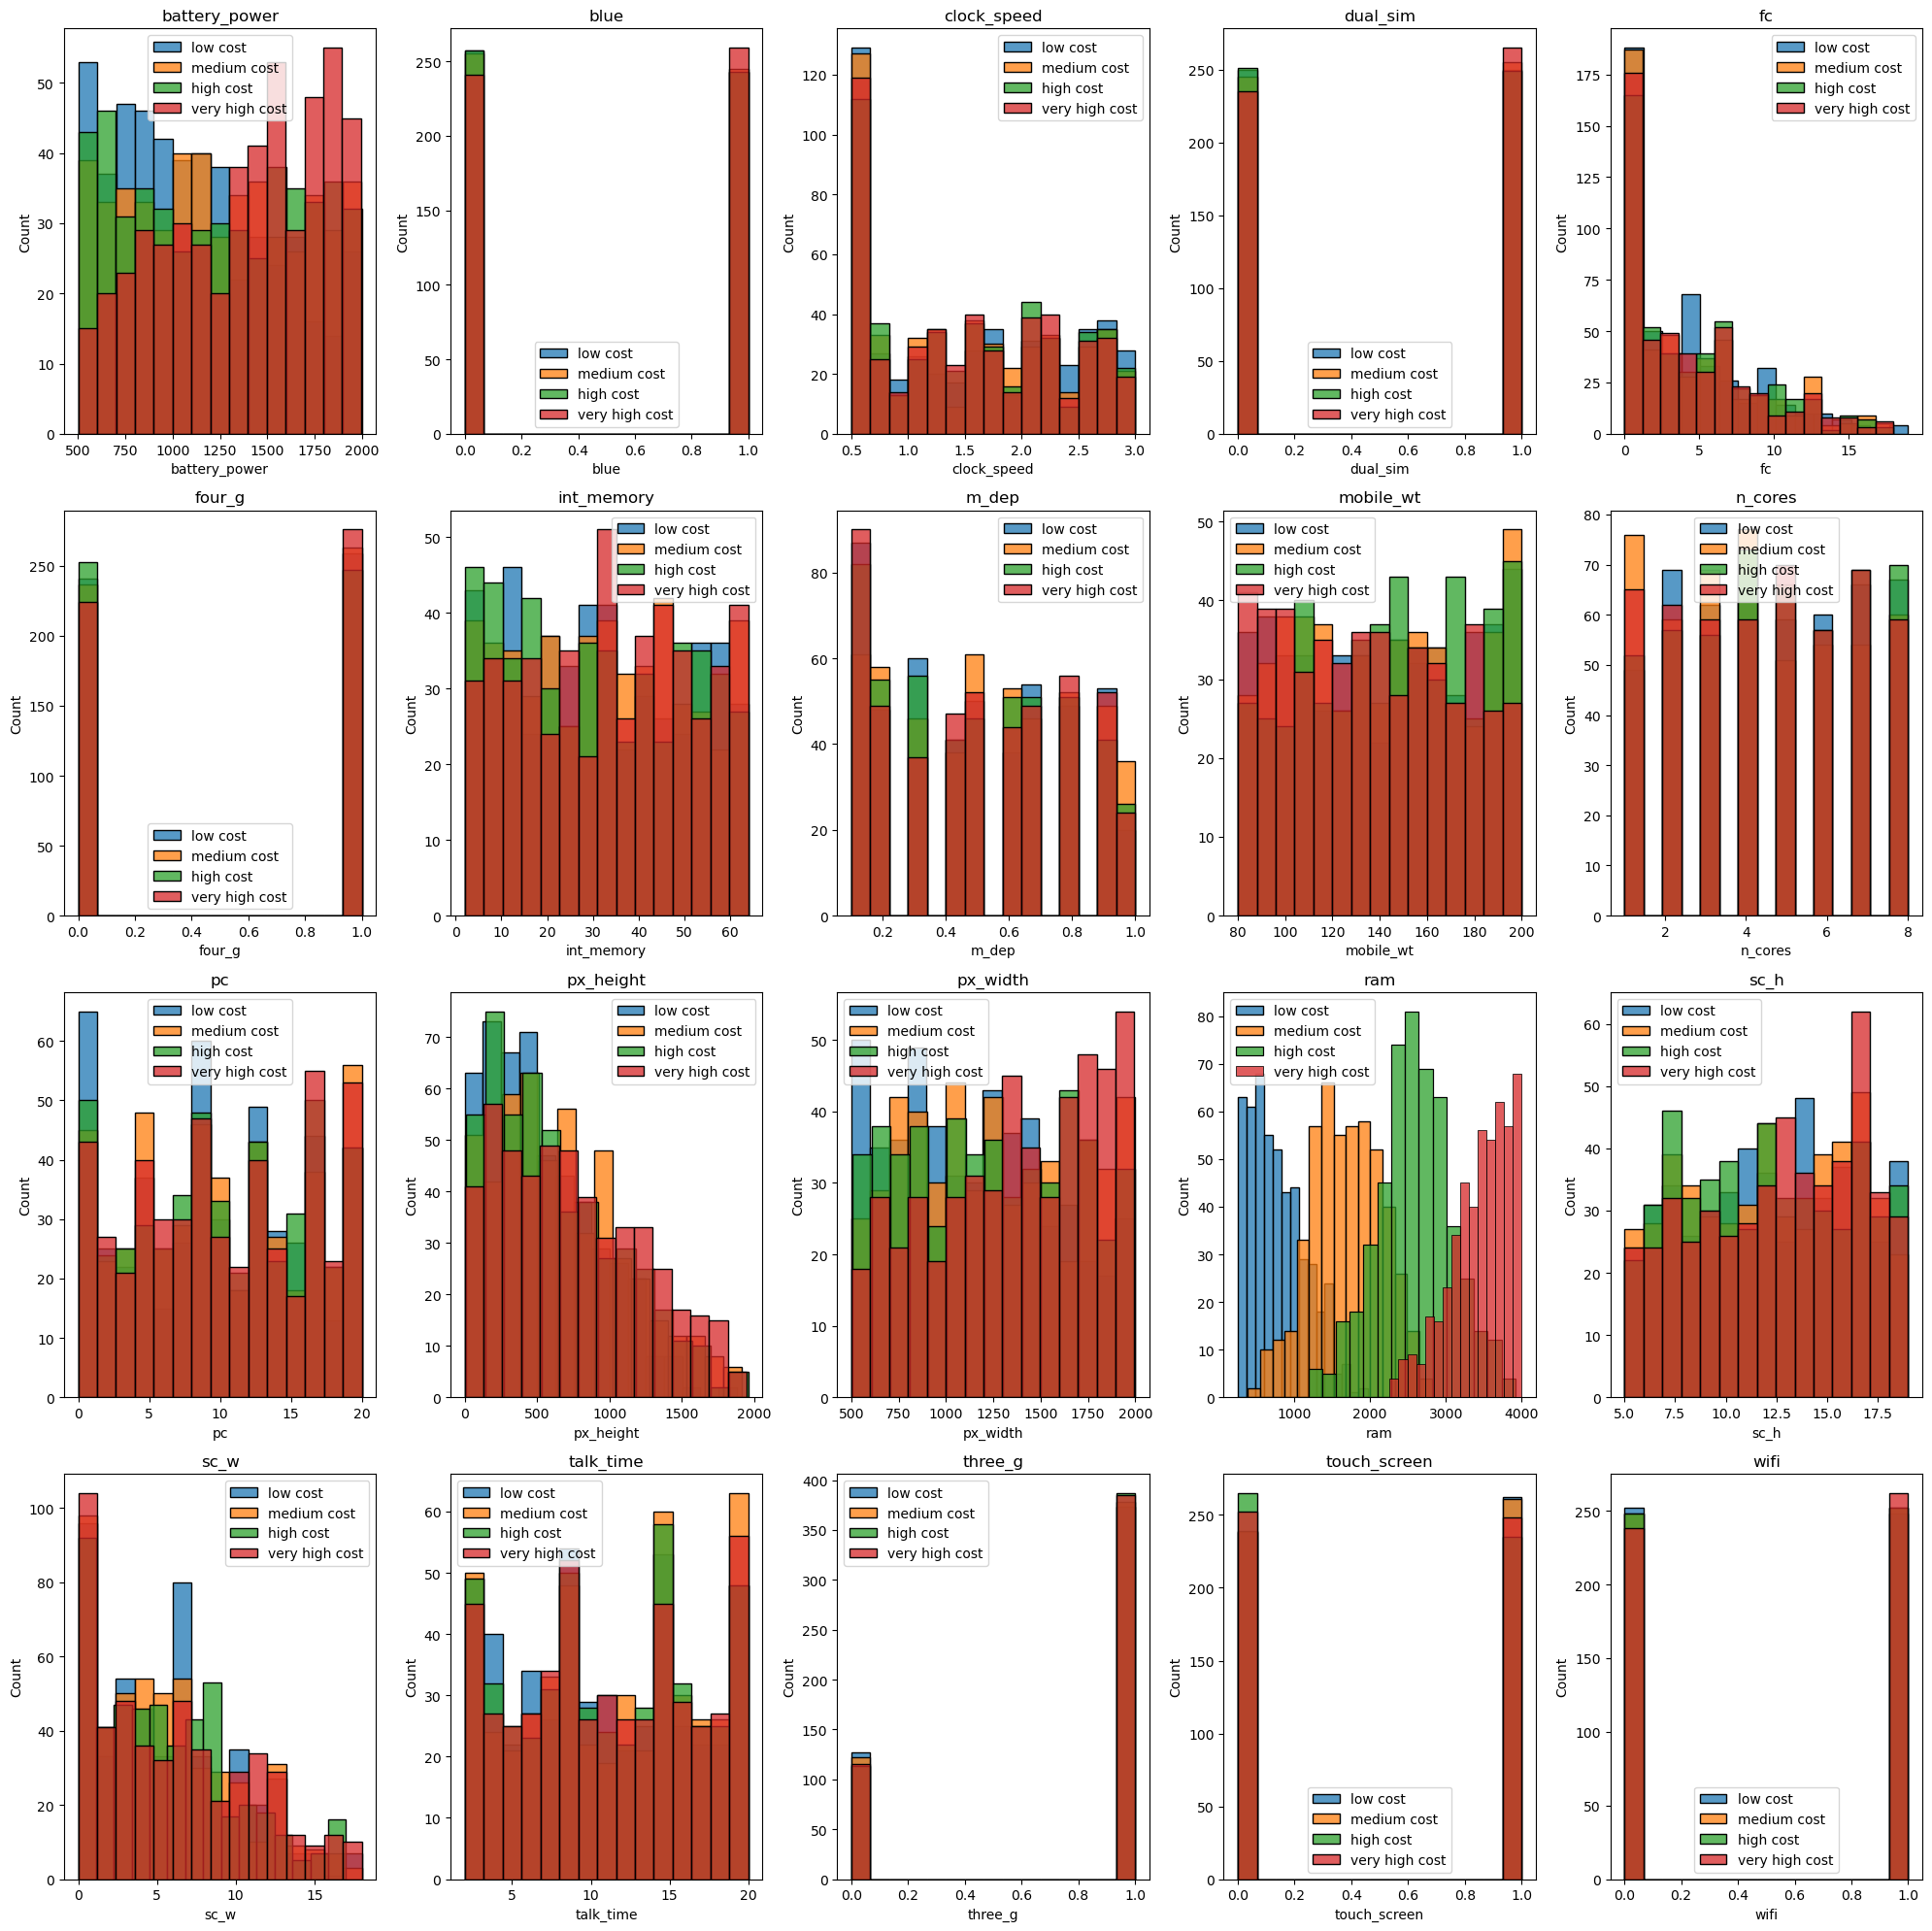

In [10]:
# Bivariate analysis plot (check each feature against target variable)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure()
fig, ax = plt.subplots(4,5,figsize=(20, 20))
i = 0
for feature in df.columns[:-1]:
    i+=1
    plt.subplot(4,5,i)
    sns.histplot(df[df['price_range']==0][feature], bins=15, label="low cost")
    sns.histplot(df[df['price_range']==1][feature], bins=15, label="medium cost")
    sns.histplot(df[df['price_range']==2][feature], bins=15, label="high cost")
    sns.histplot(df[df['price_range']==3][feature], bins=15, label = "very high cost")
    plt.title(feature)
    plt.legend()
fig.tight_layout()
plt.show()

# result: Ram feature achieves the best separation between classes

## prepare df data for training model (split df into two dataset: one for train model and one for evaluation)

In [11]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [12]:
# Isolate target variable from df
y = df['price_range']
X = df.drop(columns='price_range')

In [13]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0


In [14]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [15]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2) # (80% training, 20% evaluation)

In [16]:
dt = DecisionTreeClassifier(random_state=42) 
param_dist = {'max_depth': randint(1, 30)}
rand_search = RandomizedSearchCV(dt, param_distributions=param_dist)
rand_search.fit(X_train, y_train)
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 6}


In [17]:
y_pred = rand_search.predict(X_eval)

In [18]:
# se accuracy metric to evaluate a model
accuracy = accuracy_score(y_eval, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8375


In [19]:
# optimize a model by using a Random forest
from sklearn.ensemble import RandomForestClassifier
# add new hyperparameters, and tune them using RandomizedSeacrhCV
param_dist_v2 = {'max_depth': randint(1, 30),
                'n_estimators': randint(10, 50), 'min_samples_leaf': randint(10, 50)}
rf = RandomForestClassifier(random_state=42)
rand_search_v2 = RandomizedSearchCV(rf, param_distributions=param_dist_v2)
rand_search_v2.fit(X_train, y_train)
print('Best hyperparameters:', rand_search_v2.best_params_)

Best hyperparameters: {'max_depth': 13, 'min_samples_leaf': 22, 'n_estimators': 39}


In [20]:
y_pred_v2 = rand_search_v2.predict(X_eval)

In [21]:
accuracy = accuracy_score(y_eval, y_pred_v2)
print("Accuracy:", accuracy)

Accuracy: 0.8175


In [22]:
final_model = rand_search_v2.best_estimator_
print(final_model)

RandomForestClassifier(max_depth=13, min_samples_leaf=22, n_estimators=39,
                       random_state=42)


In [23]:
feature_names = list(X_train.columns)
print(len(feature_names))

20


In [24]:
import joblib
model_artifact = {
    "columns": feature_names,
    "rf_model": final_model, 
}
joblib.dump(model_artifact, "model.joblib")

['model.joblib']